In [1]:
from yelpapi import YelpAPI
import requests
import pandas as pd
import json
import sys
import re
import warnings
import matplotlib.patches as mpatches
warnings.filterwarnings('ignore')
from datetime import date
from shapely.geometry import Point
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
current_date = date.today().strftime('%Y-%m-%d')

city = 'Fargo'
state = 'ND'

In [3]:
%run ../src/yelp_pull_restaurant_data.py --city fargo --state nd

Restaurant Data successfully pulled for: Fargo, nd


In [3]:
print("A Restaurant report of "+city+", "+state)

A Restaurant report of Fargo, ND


In [4]:
df = pd.read_csv("./data/"+city+"_Restaurants_"+current_date+".csv")
df = df[['name', 'review_count', 'rating', 'transactions', 'price', 'display_phone', 'display_address', 'latitude', 'longitude', 'foodtype']]
df['display_address'] = df['display_address'].apply(lambda x: x.replace("[", "").replace("]", "").replace("'", ""))

Warning 1: +init=epsg:XXXX syntax is deprecated. It might return a CRS with a non-EPSG compliant axis order.


Total Number of Restaurants in Fargo: 495


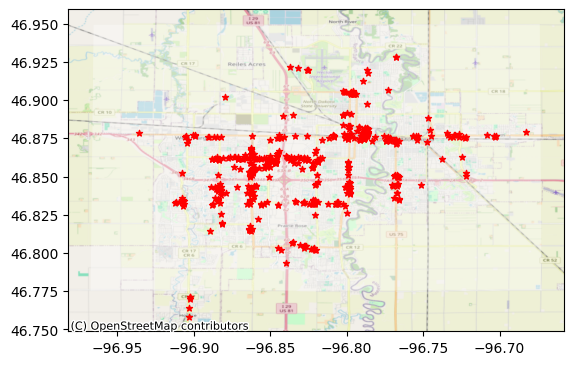

In [5]:
#Plot a map of Restaurants
geometry = [Point(xy) for xy in zip(df['longitude'],df['latitude'])]

wardlink = "./geodata/Fargo-Moorhead_Area-polygon.shp"

ward = gpd.read_file(wardlink, bbox=None, mask=None, rows=None)
geo_df = gpd.GeoDataFrame(geometry = geometry)

ward.crs = {'init':"epsg:4326"}
geo_df.crs = {'init':"epsg:4326"}

ax = ward.plot(alpha=0.35, color='#ffffff', zorder=1)
ax = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '*',label = city, zorder=3)
ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
print("Total Number of Restaurants in "+city+": "+str(len(df)))
plt.show()

In [6]:
df = df[['name', 'review_count', 'rating', 'transactions', 'price', 'display_phone', 'display_address', 'foodtype']]
ratings = df.sort_values(['rating', 'review_count'], ascending=[False, False])
ratings = ratings[ratings['review_count'] != 0]
print("Top Ten highest rated restaurants in "+city+":")
ratings.head(10)

Top Ten highest rated restaurants in Fargo:


,name,review_count,rating,transactions,price,display_phone,display_address,foodtype
25,GP’s Greek Kitchen,103,5.0,delivery,$$,(701) 639-7232,"2553 Kirsten Ln S, Ste 206, Fargo, ND 58104",greek
60,Madina Cuisine,56,5.0,delivery,$,(701) 235-0504,"2225 13th Ave S, Fargo, ND 58103",african
24,ThaiKota,41,5.0,delivery,NaN,(701) 212-4851,"1201 1st Ave N, Fargo, ND 58102",thai
157,Tea and Crepe,28,5.0,"pickup, delivery",NaN,(701) 540-6737,"72 Broadway N, Fargo, ND 58102",icecream
76,Newroz Kebab,22,5.0,"pickup, delivery",NaN,(218) 227-5019,"2501 8th St S, Moorhead, MN 56560",kebab
131,Mehl's Gluten-Free Bakery,21,5.0,NaN,$$,(701) 205-4174,"1404 33rd St S, Ste H, Fargo, ND 58103",cupcakes
0,Spaghetti Western,19,5.0,NaN,$$,(701) 532-4699,"524 Broadway N, Fargo, ND 58102",italian
45,Tati's Mediterranean Saveur,9,5.0,"pickup, delivery",NaN,(701) 532-4545,"3150 Sheyenne St, Ste 170, West Fargo, ND 58078",lebanese
9,Soho23 Korean & Japanese Cuisine,8,5.0,NaN,NaN,(701) 237-0779,"1450 25th St S, Fargo, ND 58103",japanese
223,Hi-Ho Burgers & Brews,8,5.0,delivery,$,(218) 287-2975,"10 Center Ave E, Dilworth, MN 56529",burgers


In [7]:
print("Top Ten lowest rated restaurants in "+city+":")
ratings.tail(10)

Top Ten lowest rated restaurants in Fargo:


,name,review_count,rating,transactions,price,display_phone,display_address,foodtype
426,Subway,2,1.0,NaN,$,(701) 356-0920,"3757 55th Ave S, Fargo, ND 58104",sandwiches
476,Casey's,2,1.0,delivery,NaN,(701) 277-4389,"4405 45th St S, Fargo, ND 58104",pizza
106,Hen House Bar & Restaurant,1,1.0,NaN,NaN,(218) 359-0744,"935 37th Ave S, Ste 136, Moorhead, MN 56560",sandwiches
125,The Headquarters Restaurant & Sports Bar,1,1.0,NaN,NaN,(701) 532-2060,"7951 Jacks Wy, Ste 104, Horace, ND 58047",sportsbars
228,Fargo Fillies,1,1.0,NaN,NaN,(218) 443-2433,"Fargo, ND 58103",foodtrucks
336,Sbc Deli,1,1.0,NaN,NaN,(701) 373-0028,"122 23rd St S, Fargo, ND 58103",delis
398,Red River Lanes Bowling Center,1,1.0,NaN,NaN,(701) 235-1171,"707 28th Ave N, Fargo, ND 58102",bowling
408,Casey's,1,1.0,delivery,NaN,(701) 281-3091,"204 42nd St S, Fargo, ND 58103",pizza
484,Papa Johns Pizza,1,1.0,"pickup, delivery",$,(701) 237-9999,"1100 19th Ave N, Unit N, Fargo, ND 58102",pizza
490,Subway,1,1.0,delivery,$,(218) 233-5972,"201 34th St N, Moorhead, MN 56560",sandwiches


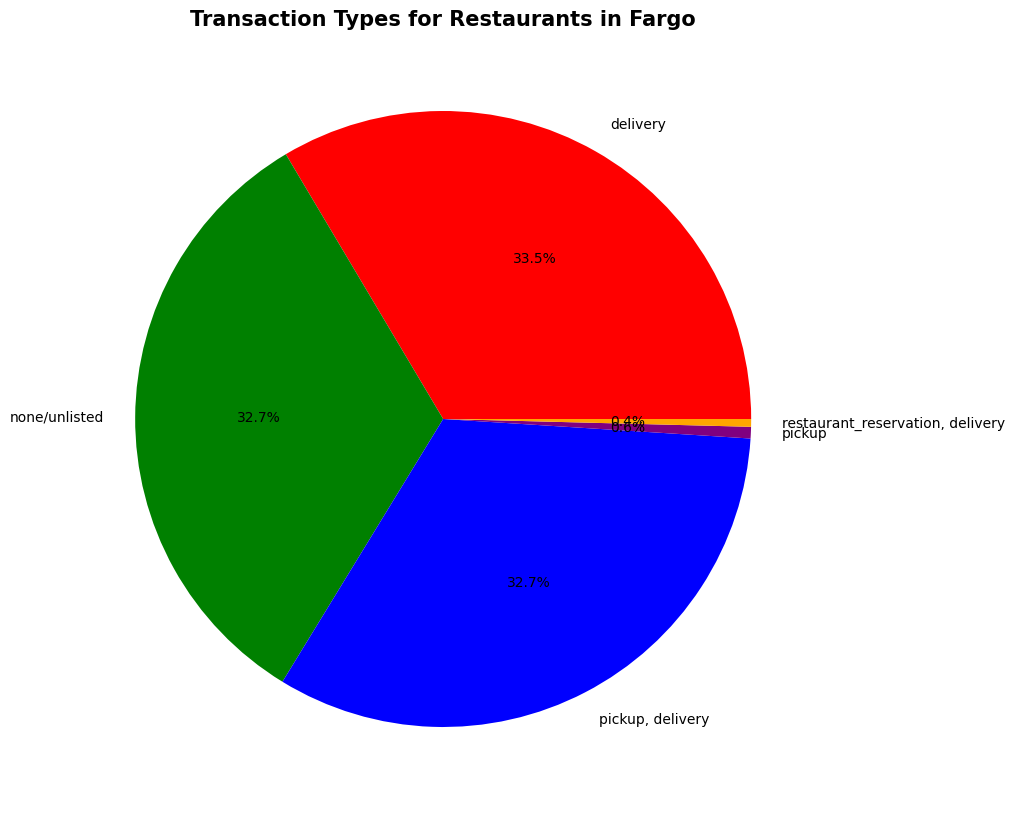

In [8]:
df['transactions'] = df['transactions'].fillna('none/unlisted')
transactions_df = df["transactions"].value_counts()
transactions_df.plot.pie(figsize=(15, 10), autopct='%1.1f%%', colors=['red', 'green', 'blue', 'purple', 'orange', 'pink', 'yellow'])
plt.title("Transaction Types for Restaurants in "+city, fontdict={'size': 15, 'weight': 'bold'})
plt.ylabel("")
plt.show()

In [9]:
#convert food types
def map_foodtypes(foodtype):
    if foodtype == "restaurants":
        return 'miscellaneous'
    elif foodtype == "tacos":
        return 'mexican'
    elif foodtype == "burgers" or foodtype == "chicken_wings" or foodtype == "tradamerican" or foodtype == "newamerican":
        return 'american'
    if foodtype == "sandwiches" or foodtype == "soup":
        return 'soup_sandwich'
    elif foodtype == "breakfast_brunch":
        return 'breakfast'
    if foodtype == "sportsbars" or foodtype == "cocktailbars" or foodtype == "wine_bars":
        return 'bars'
    elif foodtype == "ramen":
        return 'noodles'    
    elif foodtype == "irish_pubs" or foodtype == "gastropubs":
        return 'pubs'  
    elif foodtype == "bagels":
        return 'bakeries'
    elif foodtype == "cupcakes" or foodtype == "donuts":
        return 'desserts' 
    elif foodtype == "asianfusion":
        return 'asian' 
    elif foodtype == "egyptian" or foodtype == "lebanese":
        return 'mideastern'
    elif foodtype == "cheesesteaks":
        return 'steak'  
    elif foodtype == "danceclubs" or foodtype == "nightclubs":
        return 'nightlife'     
    else:
        return foodtype

# apply the function to create the new column
df["foodtype"] = df["foodtype"].apply(map_foodtypes)

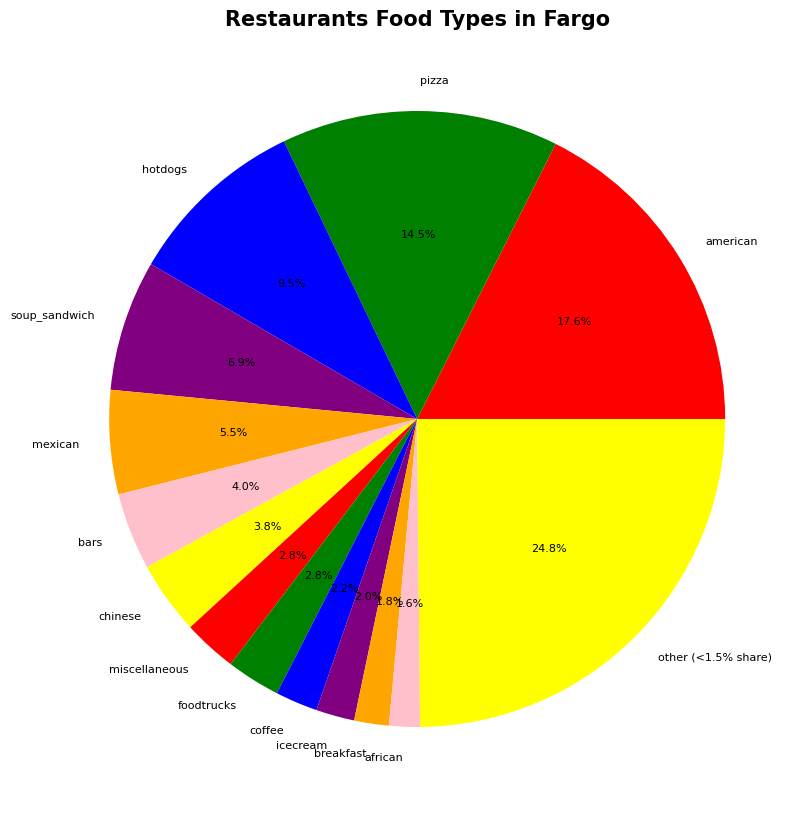

In [10]:
#create pie chart of food types
foodtype_count = df["foodtype"].value_counts()

# create new category that groups builders making up <2% of total
total = foodtype_count.sum()
threshold = 0.015

foodtype_percent = foodtype_count/foodtype_count.sum()
other_percent = foodtype_percent[foodtype_percent < threshold].sum()
foodtype_percent = foodtype_percent[foodtype_percent >= threshold]
foodtype_percent["other (<1.5% share)"] = other_percent
foodtype_percent.plot.pie(figsize=(15, 10), autopct='%1.1f%%', colors=['red', 'green', 'blue', 'purple', 'orange', 'pink', 'yellow'], textprops={'fontsize': 8})
plt.title("Restaurants Food Types in "+city, fontdict={'size': 15, 'weight': 'bold'})
plt.ylabel("")
plt.show()

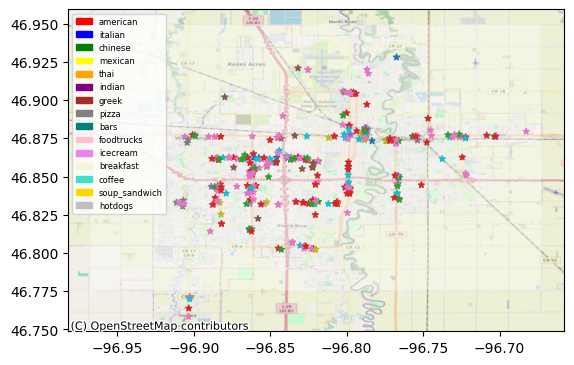

In [11]:
colormap = {
'american': 'red',
'italian': 'blue',
'chinese': 'green',
'mexican': 'yellow',
'thai': 'orange',
'indian': 'purple',
'greek': 'brown',
'pizza': 'gray',
'bars': 'teal',
'foodtrucks': 'pink',
'icecream': 'violet',
'breakfast': 'beige',
'coffee': 'turquoise',
'soup_sandwich': 'gold',
'hotdogs': 'silver'
}

geo_df['color'] = df['foodtype'].map(colormap)


legend_patches = [mpatches.Patch(color=color, label=food_type) for food_type, color in colormap.items()]

ax = ward.plot(alpha=0.35, color='#ffffff', zorder=1)
ax = geo_df.plot(ax=ax, markersize=20, column='color', marker='*', label=city, zorder=3)
ctx.add_basemap(ax, crs=geo_df.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)
plt.legend(handles=legend_patches, loc="upper left", prop={'size': 6})
plt.show()

In [12]:
#convert price to word format
def map_price(price):
    if price == "$":
        return 'Low'
    elif price == "$$":
        return 'Medium'
    elif price == "$$$":
        return 'High'
    elif price == "$$$$":
        return 'Very High'
    elif price == "None":
        return 'Unlisted'
    else:
        return price

# apply the function to create the new column
df["price_val"] = df["price"].apply(map_price)
price_count = df["price_val"].value_counts()
print("Number of restaurants for each price:")
print(price_count)

Number of restaurants for each price:
Low          144
Medium       134
High           7
Very High      1
Name: price_val, dtype: int64


Note: This chart doesn't include restaurants where the price wasn't listed


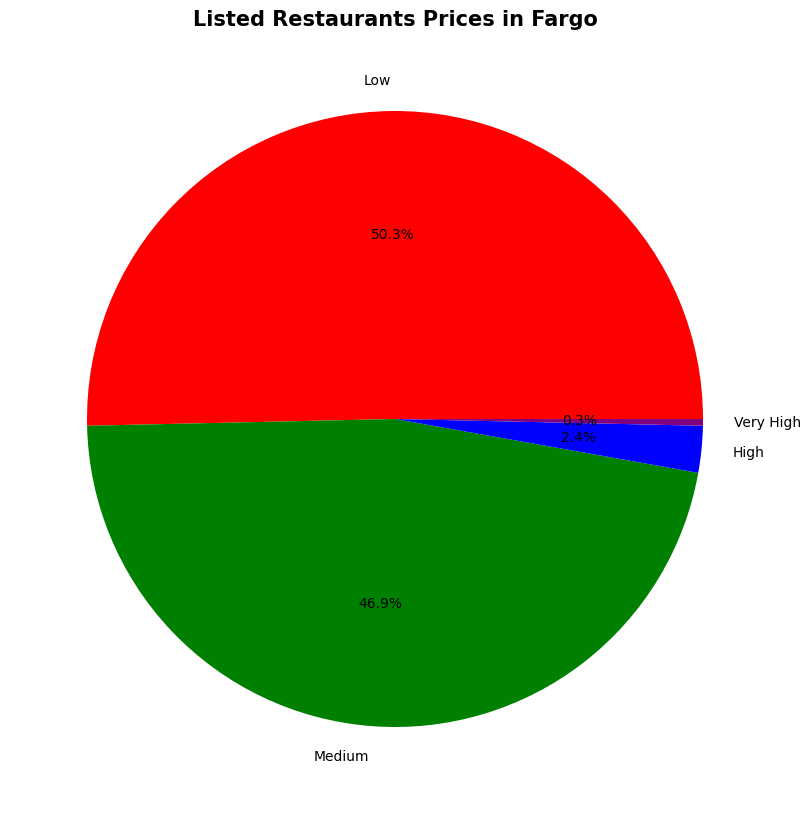

In [13]:
price_count.plot.pie(figsize=(15, 10), autopct='%1.1f%%', colors=['red', 'green', 'blue', 'purple', 'orange', 'pink', 'yellow'])
plt.title("Listed Restaurants Prices in "+city, fontdict={'size': 15, 'weight': 'bold'})
plt.ylabel("")
print("Note: This chart doesn't include restaurants where the price wasn't listed")
plt.show()

In [14]:
# Group by foodtype and calculate the mean rating
average_rating = df.groupby('foodtype')['rating'].mean()
average_rating = pd.DataFrame(average_rating)
average_rating = pd.merge(average_rating, df.groupby('foodtype')['review_count'].sum(), on='foodtype')
average_rating = average_rating[average_rating['review_count'] != 0]
average_rating = average_rating.sort_values(['rating'], ascending=[False])

restaurant_count = df["foodtype"].value_counts()
restaurant_count = pd.DataFrame(restaurant_count)
restaurant_count

average_rating = pd.merge(average_rating, restaurant_count, left_index=True, right_index=True)
average_rating = average_rating.rename(columns={'foodtype': 'restaurant_count'}) 
print("Average rating of each restaurant food type:")
print(average_rating)

Average rating of each restaurant food type:
                   rating  review_count  restaurant_count
kebab            5.000000            22                 1
hotels           4.750000            19                 2
greek            4.750000           153                 2
desserts         4.500000           314                 4
asian            4.500000            17                 1
french           4.500000             3                 1
diners           4.500000            55                 2
thai             4.375000           244                 4
indpak           4.375000           483                 4
vietnamese       4.333333           235                 3
bakeries         4.333333           312                 3
hotdog           4.250000             3                 2
fishnchips       4.166667           361                 3
japanese         4.100000           283                 5
african          4.062500           116                 8
tapasmallplates  4.000000  

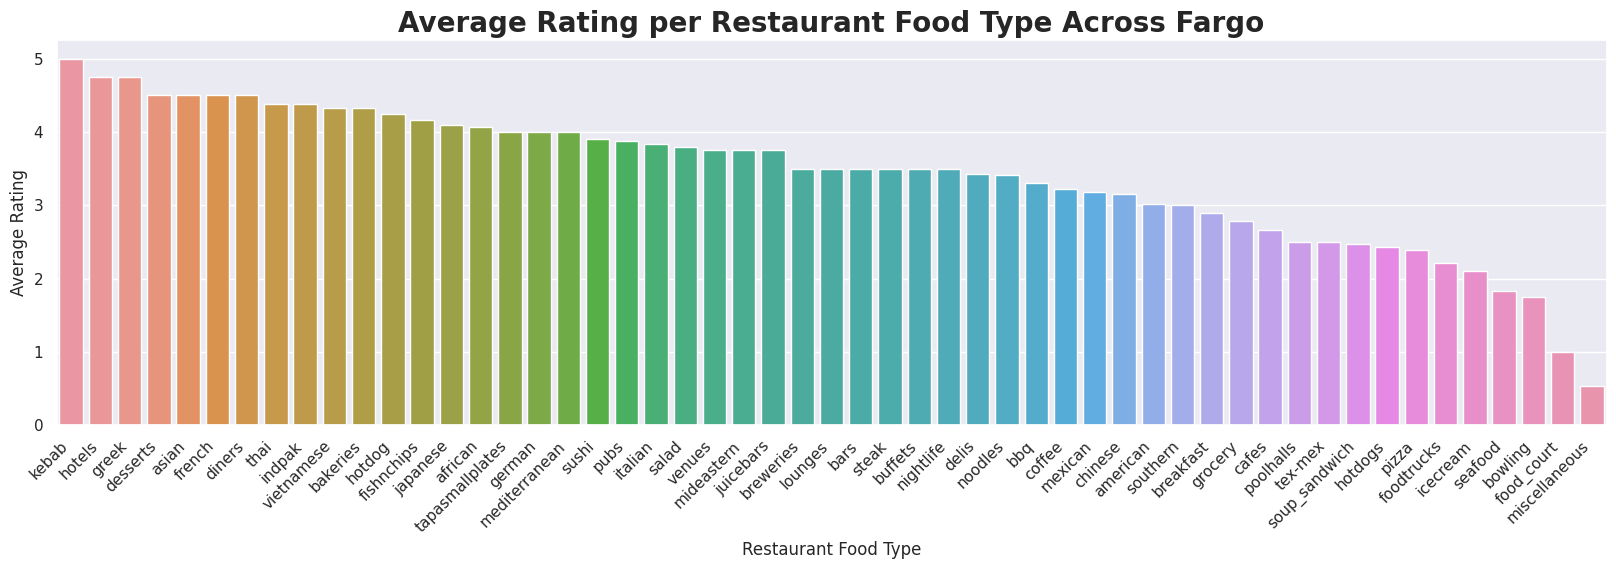

In [15]:
sns.set(rc={"figure.figsize":(20, 5)})
rating_barplot = sns.barplot(x = average_rating.index, y = 'rating', data = average_rating)
plt.xlabel('Restaurant Food Type')
plt.ylabel('Average Rating')
rating_barplot.set_xticklabels(rating_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Average Rating per Restaurant Food Type Across '+ city, fontdict={'size': 20, 'weight': 'bold'})
plt.show()

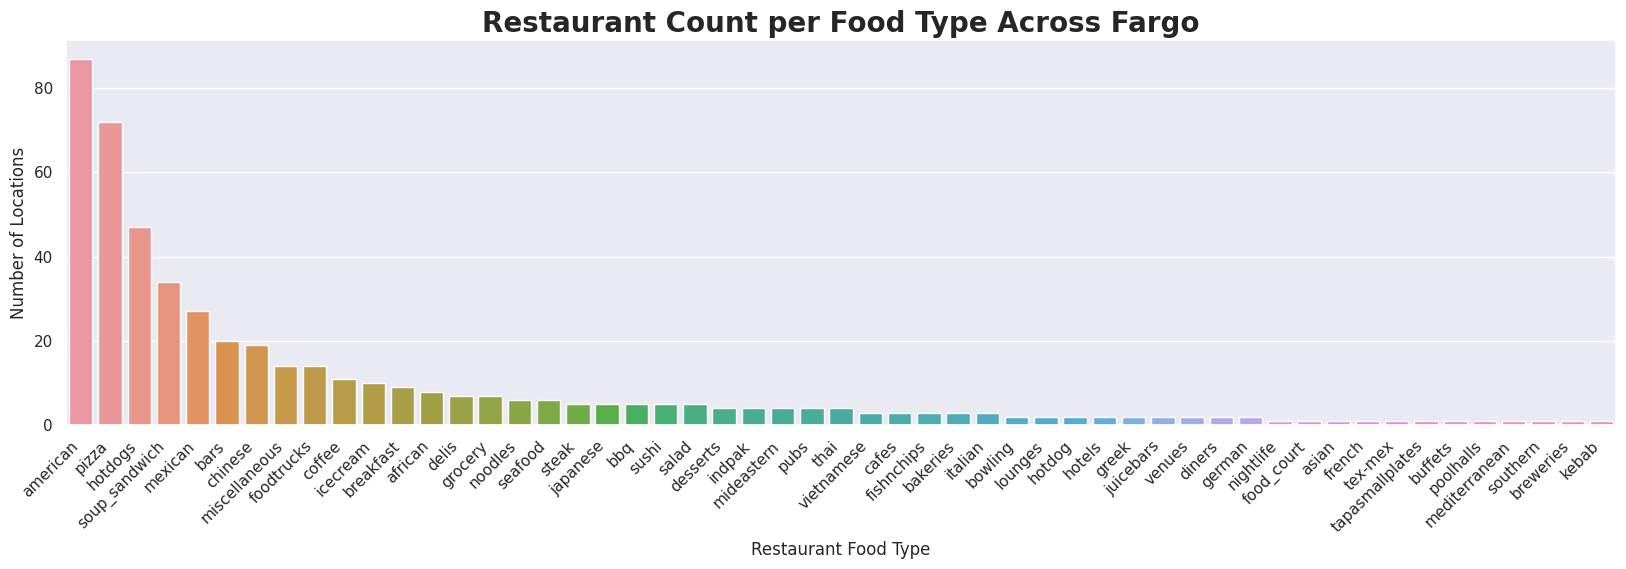

In [16]:
average_rating = average_rating.sort_values(['restaurant_count'], ascending=[False])
sns.set(rc={"figure.figsize":(20, 5)})
rating_barplot = sns.barplot(x = average_rating.index, y = 'restaurant_count', data = average_rating)
plt.xlabel('Restaurant Food Type')
plt.ylabel('Number of Locations')
rating_barplot.set_xticklabels(rating_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Restaurant Count per Food Type Across '+ city, fontdict={'size': 20, 'weight': 'bold'})
plt.show()

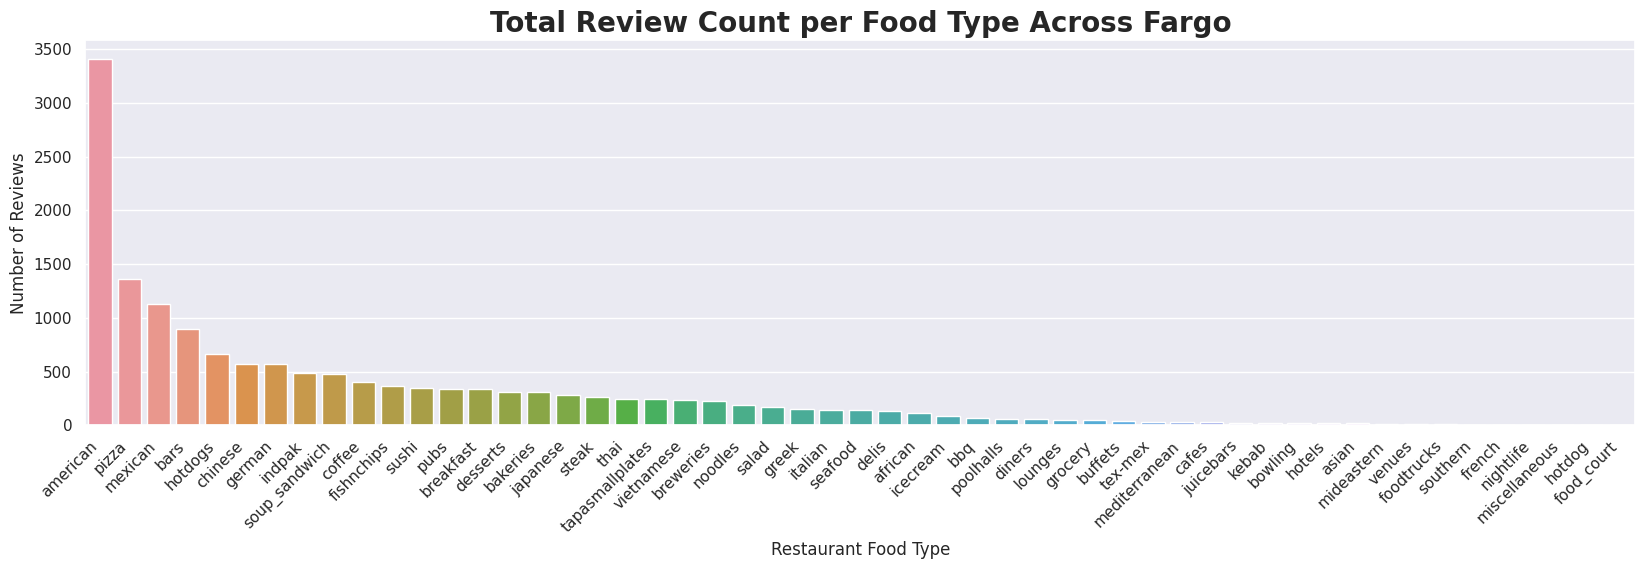

In [17]:
average_rating = average_rating.sort_values(['review_count'], ascending=[False])
sns.set(rc={"figure.figsize":(20, 5)})
rating_barplot = sns.barplot(x = average_rating.index, y = 'review_count', data = average_rating)
plt.xlabel('Restaurant Food Type')
plt.ylabel('Number of Reviews')
rating_barplot.set_xticklabels(rating_barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Total Review Count per Food Type Across '+ city, fontdict={'size': 20, 'weight': 'bold'})
plt.show()

In [18]:
df = df.sort_values(['price'], ascending=[False])
print("Top Ten most expensive restaurants in "+city+":")
df.head(10)

Top Ten most expensive restaurants in Fargo:


,name,review_count,rating,transactions,price,display_phone,display_address,foodtype,price_val
297,Papa Murphy's,7,3.5,none/unlisted,$$$$,(701) 365-8282,"4501 15th Avenue South, Suite 111, Fargo, ND 5...",pizza,Very High
92,Cork 'N Cleaver,60,3.0,delivery,$$$,(701) 237-6790,"3301 S University Dr, Fargo, ND 58104",steak,High
4,Mezzaluna,362,4.5,delivery,$$$,(701) 364-9479,"309 Roberts St N, Fargo, ND 58102",american,High
32,Maxwells Restaurant & Bar,125,4.5,delivery,$$$,(701) 277-9463,"1380 9th St E, West Fargo, ND 58078",american,High
50,Urban 42,37,3.0,delivery,$$$,(701) 281-7105,"1635 42nd St S, Fargo, ND 58103",american,High
12,Rustica Eatery & Tavern,161,4.5,"restaurant_reservation, delivery",$$$,(218) 227-5388,"315 Main Ave, Moorhead, MN 56560",soup_sandwich,High
190,O'kelly's Tastes & Toddies,8,3.0,delivery,$$$,(701) 277-1880,"3800 Main Ave, Fargo, ND 58103",bars,High
351,Hornbacher's Foods,6,3.0,none/unlisted,$$$,(701) 280-1999,"1532 32nd Ave S, Ste 3, Fargo, ND 58103",grocery,High
0,Spaghetti Western,19,5.0,none/unlisted,$$,(701) 532-4699,"524 Broadway N, Fargo, ND 58102",italian,Medium
192,Labby’s Grill And Bar,29,3.5,delivery,$$,(701) 478-5227,"1100 19th Ave N, Fargo, ND 58102",bars,Medium
